In [1]:
library(Seurat)


Warning message:
"package 'Seurat' was built under R version 4.4.1"
Loading required package: SeuratObject

Loading required package: sp

'SeuratObject' was built with package 'Matrix' 1.7.0 but the current
version is 1.7.1; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t




In [2]:
seurat_obj <- readRDS("../clustering/out/integrated_seurat_clusters_0.2.rds")

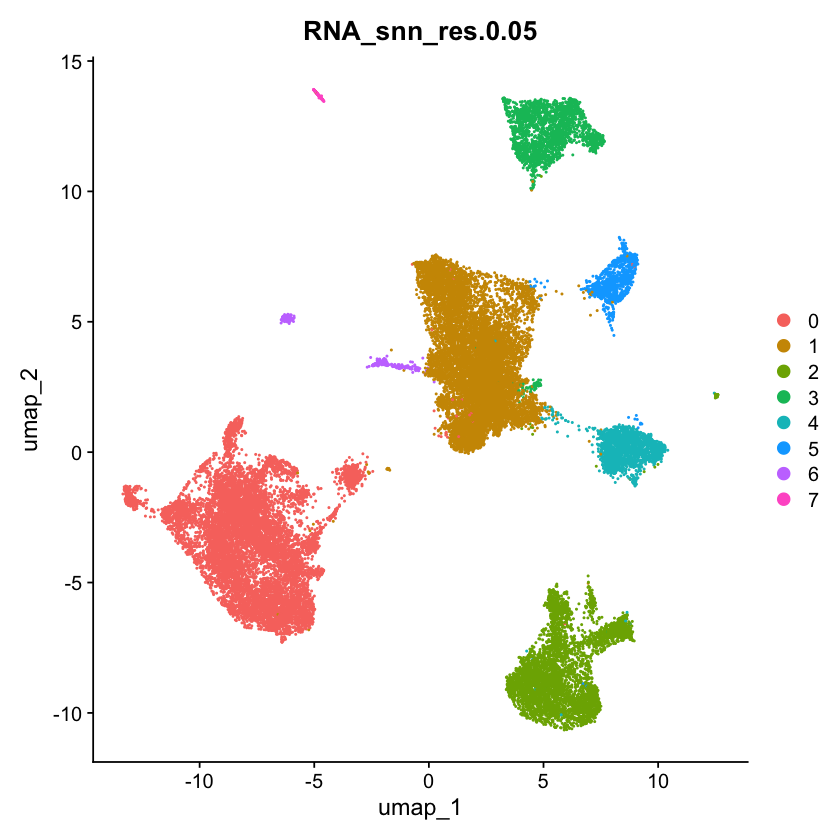

In [9]:
DimPlot(seurat_obj, group.by="RNA_snn_res.0.05")

In [11]:
seurat_obj <- SetIdent(seurat_obj, value="RNA_snn_res.0.05")

In [12]:
markers <- FindAllMarkers(seurat_obj, value="RNA_snn_res.0.05")

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



In [13]:
cluster_markers <- split(markers, as.factor(markers$cluster))
sorted_markers <- lapply(cluster_markers, function(x) {
    sorted_markers_index <- order(x$avg_log2FC, decreasing=T)
    sorted_markers <- x[sorted_markers_index,]
})

In [14]:
writexl::write_xlsx(sorted_markers, path="./out/markers.xlsx")